In [147]:
import numpy as np
import seaborn as sns
import scipy.io as sio
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def rawData(string):
    mat = sio.loadmat(string)
    header = mat.keys()
    experiment = np.array([[a[1][0][0],a[3][0][0],a[4][0][0]] for a in mat[header[0]][0]])
    loc = (mat[header[3]])[0][0][7]
    rawdata = np.array([s[0] for s in mat[header[5]][:,0]])
    return rawdata

def readData(string):
    mat = sio.loadmat(string)
    header = mat.keys()
    experiment = np.array([[a[1][0][0],a[3][0][0],a[4][0][0]] for a in mat[header[0]][0]])
    loc = (mat[header[3]])[0][0][7]
    rawdata = np.array([s[0] for s in mat[header[5]][:,0]])
    ##preprocessing
    ground_mean = np.mean(rawdata, axis=0)
    ground_std = np.std(rawdata, axis =0)
    a = (rawdata-ground_mean)/ground_std
    bound = np.max(abs(a))
    scale_data = a/bound
    return (scale_data, loc, experiment)
    
def map_mat(data, loc, i, slice):
    draw3d= data[i]
    draw2d = draw3d[loc[:,2]==slice]
    xy = (loc[loc[:,2]==slice,:2])
    drawmat = np.empty((64,64))
    drawmat[:] = np.nan
    count = 0
    for idx in xy:
        drawmat[idx[0],idx[1]] = draw2d[count]
        count+=1      
    masked_array = np.ma.array (drawmat, mask=np.isnan(drawmat))
    cmap = plt.cm.rainbow
    cmap.set_bad('w',1.)
    plt.imshow((masked_array), interpolation='nearest', cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(slice)
    
def main():
    rawdata = rawData('../data/data-science-P1.mat')
    Y, loc,experiment  = readData('../data/data-science-P1.mat')
    np.save('../data/processed_data.npy', (Y, loc, experiment))
    fig = plt.figure(1)
    fig.add_subplot(331)
    map_mat(Y,loc,1,1)
    fig.add_subplot(332)
    map_mat(Y,loc,1,2)
    fig.add_subplot(333)
    map_mat(Y,loc,1,3)

    fig.add_subplot(334)
    map_mat(Y,loc,1,4)
    fig.add_subplot(335)
    map_mat(Y,loc,1,5)
    fig.add_subplot(336)
    map_mat(Y,loc,1,6)

    fig.add_subplot(337)
    map_mat(Y,loc,1,7)
    fig.add_subplot(338)
    map_mat(Y,loc,1,8)
    fig.add_subplot(339)
    map_mat(Y,loc,1,9)
    plt.savefig("../results/refrigerator.png")
    
    plt.figure(1)
    sns.distplot(rawdata.reshape((360*21764)),axlabel="raw activation value")
    plt.savefig('../results/raw_activation_hist.png')
    plt.figure(2)
    sns.distplot(Y.reshape((360*21764)),axlabel="scaled activation value")
    plt.savefig('../results/scaled_activation_hist.png')

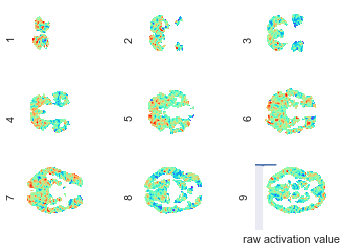

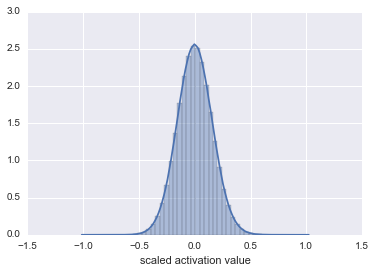

In [148]:
if __name__ == "__main__":
    main()
#uniq_pair = experiment[experiment[:,2]==1,:2]
#mean_data = np.zeros((60,21764))
#for i in np.arange(1):
#experiment[np.where(experiment[:,:2]==uniq_pair[0,:]),:]
#    mask =(experiment[:,:2]==uniq_pair[i,:]).all(1)
#    subdata = scale_a[mask,:]
    #mean_vec = np.mean(subdata,axis=0)
    #mean_data[i,:] = mean_vec